In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import exp
import itertools

# Data Generation

- Firstly, I generate data points in 3D space. We are asked to pick 40 data points, 20 from $1^{st}$ quadrant and 20 from $8^{th}$ quadrant. 
- I limited the point coordinates in a range of 3. So the points are defined as follows:

\begin{equation}
    x_{k},y_{k},z_{k} \in
\begin{cases}
    [-3,0],& \text{if $k^{th}$ data point lies in $8^{th}$ quadrant} \\
    [0,3],  & \text{if $k^{th}$ data point lies in $1^{st}$ quadrant}
\end{cases}
\end{equation}


In [2]:
positive_data = np.array([]).reshape(0,3)
negative_data = np.array([]).reshape(0,3)

In [3]:
for _ in range(20):
    positive_data = np.vstack((positive_data, 3 * np.random.random_sample((1,3))))
    negative_data = np.vstack((negative_data, 3 * np.random.random_sample((1,3))-3))
    
X = np.vstack((positive_data,negative_data))
y = np.vstack((np.ones((20,1)), -np.ones((20,1))))

In [4]:
X = X.tolist()
y = y.tolist()
y = list(itertools.chain.from_iterable(y))

In [5]:
X   # data points

[[0.5858007805649135, 0.05927581707333862, 0.8459469971365126],
 [1.8171918571806729, 0.8145646504001739, 0.34532751433325337],
 [1.0694253329388452, 2.0298290414463915, 1.2341999297623383],
 [2.074954774721652, 0.25990892057417103, 1.0154887561565],
 [0.44229568774092676, 2.1995094348849316, 0.6950257685724709],
 [2.359296720568577, 0.9675688767048259, 1.1279595768867456],
 [1.385110066860887, 2.616853876017121, 0.044442862195807065],
 [0.009881683228215588, 0.01710934514123097, 2.7905680760342095],
 [0.988806281441412, 1.890513442527648, 0.5262356791933688],
 [1.7094428148493215, 2.85817807866121, 0.49889471761633286],
 [2.958726051345482, 0.23599441693405576, 0.6454278792783305],
 [0.3569315785275968, 1.9371177170719855, 2.541599986057931],
 [1.3214326467765685, 1.7057809086811937, 0.794240754523524],
 [2.469016108102827, 2.342970102678467, 0.48454270252945375],
 [0.16740824523039965, 0.19347032778387518, 1.1927551551519608],
 [0.5728071328548746, 0.4078919412505103, 2.7227950084700

In [6]:
y    # classes

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0]

# Plot of data points

- In this part, I am plotting 40 data points in 3D space. You can clearly see the points clustered in two quadrants.
- For this and further plots, I used interactive plots, so you can do some operations on plot like zoom in/out, rotate etc.

<IPython.core.display.Javascript object>


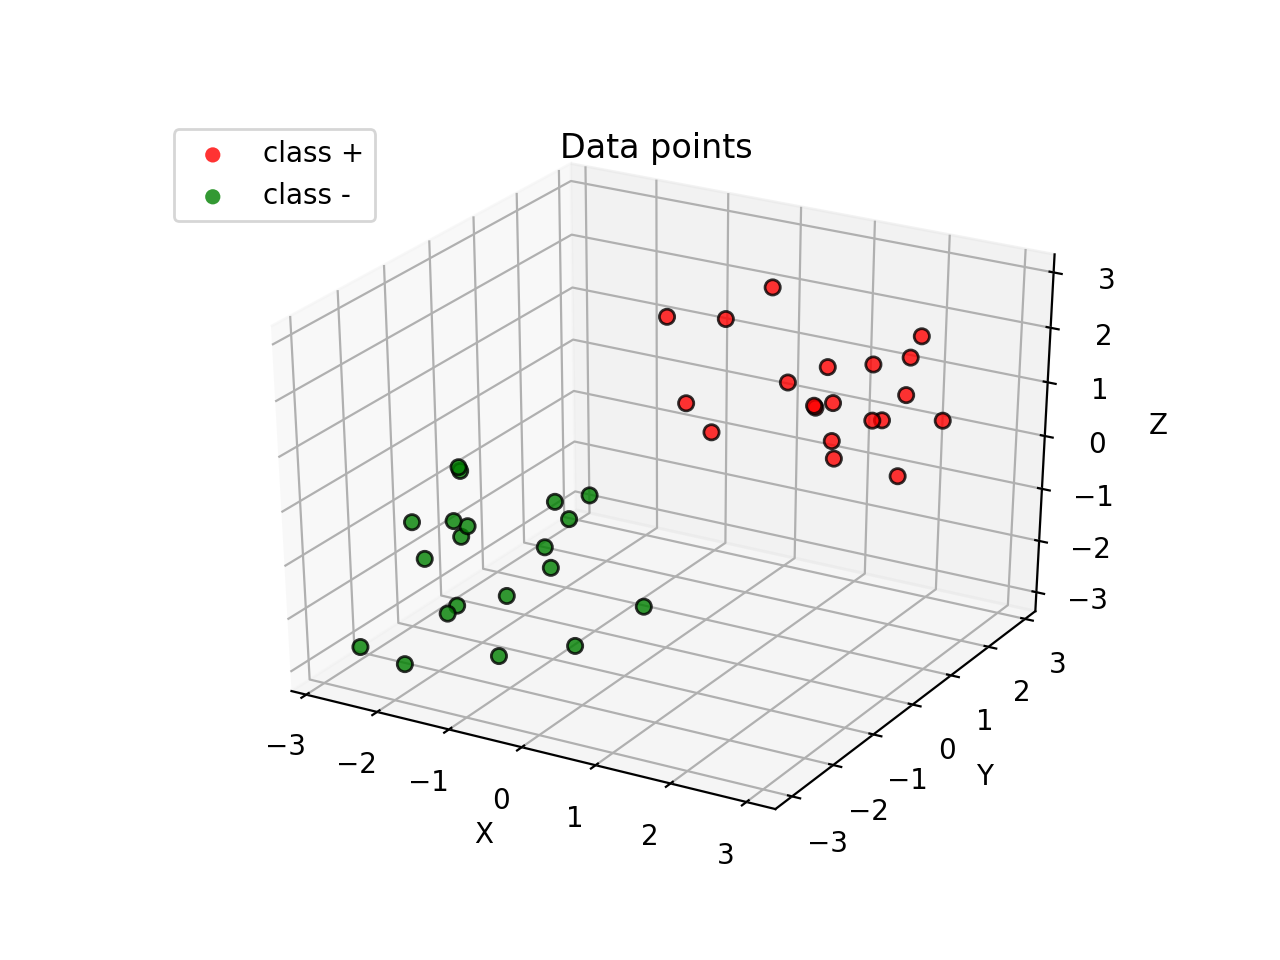

In [7]:
data = (positive_data, negative_data)
colors = ("red", "green")
groups = ("class +", "class -") 
 
# Create plot
fig = plt.figure()
ax = fig.gca(projection='3d')
 
for data, color, group in zip(data, colors, groups):
    ax.scatter(data[:,0], data[:,1], data[:,2],alpha=0.8, c=color, edgecolors='none', s=30, label=group)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('Data points')
plt.legend(loc=2)
plt.show()

# Activation Function

- As activation function I used sign function, i.e
\begin{equation}
    f(x)=
\begin{cases}
    1,& \text{if $x \geq 0$} \\
    -1,  & \text{otherwise}
\end{cases}
\end{equation}

In [8]:
def predict(x):
    return 1 if x>=0 else -1

In [9]:
def difference(a,b):
    return b-a

# Random Initialization of Weights

- Before running the perceptron learning algorithm I initialized the weight vector $\textit{w}$ with random values from $\mathcal{N}(0,\,1)$.

In [10]:
w = np.random.randn(3,1)
w = w.tolist()
w = list(itertools.chain.from_iterable(w))
w

[1.248887418254114, -1.3237643024481913, -0.3409428538154275]

# Running the Perceptron Algorithm

- In this part, I run the perceptron algorithm. 
- In one iteration, all data points are traversed and weights are updated for each data point, i.e 40 times per itration. 
- You can change alpha (learning rate) value and check the speed of convergence for different alpha values.

In [11]:
alpha = 0.01     # learning rate
accuracy = 0
errors = []      # list to store error of each iteration
while accuracy<1:
    correct=0           # will store number of correctly classified data points  
    epoch_error=0       # will store the error of current iteration
    for i in range(len(X)):
        output = 0
        for j in range(len(X[i])):
            output += X[i][j]*w[j]
        
        output = float(format(output, '.2f')) 
        output = predict(output)
        diff = difference(output,y[i])    # checks whether i'th data point is correctly classified or not.
        
        if diff==0: 
            correct+=1
            continue
        
        epoch_error += diff**2

        # update the weights according to the error of i'th data point.
        for j in range(len(w)):
            w[j] += alpha*diff*X[i][j]
    
    
    accuracy = correct/len(X)    # iteration at the end of one iteration
    print(accuracy)
    print("=======")
    errors.append(epoch_error)   # iteration error added to the list

0.625
0.875
0.925
0.95
0.975
0.975
0.975
0.975
1.0


# Final Weights

In [12]:
w

[1.5471104542771004, -0.07567405880603528, 0.36614487463374285]

# Plot of Iteration vs Error Curve

<IPython.core.display.Javascript object>


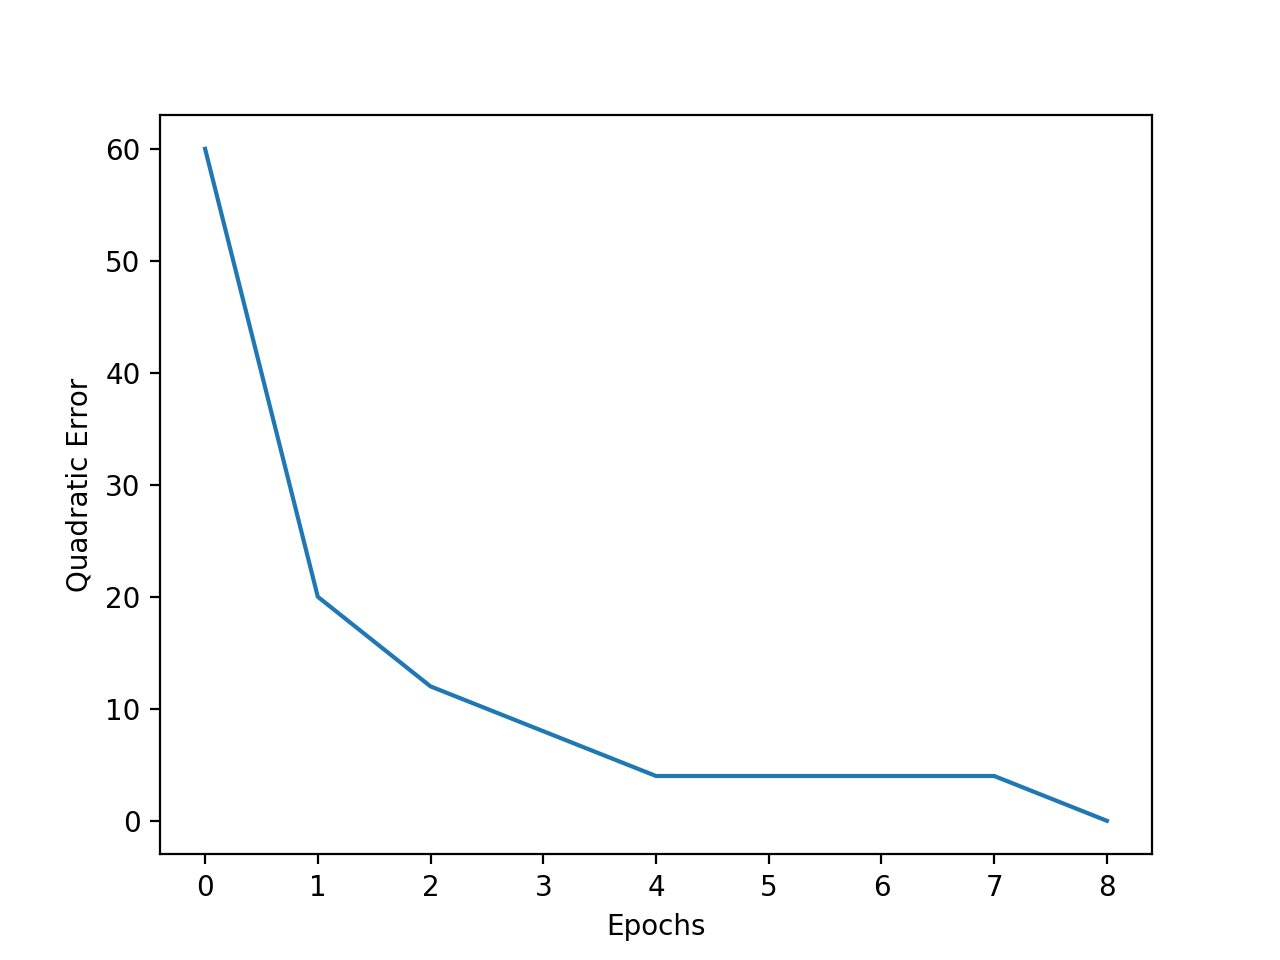

In [13]:
from matplotlib.ticker import MaxNLocator
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel('Epochs')
ax.set_ylabel('Quadratic Error')
plt.plot(np.arange(len(errors)), errors)

# Plot of Data Points and Separating Hyperplane

- You can rotate the plot and see the data points and hyperplane from different angles.

<IPython.core.display.Javascript object>


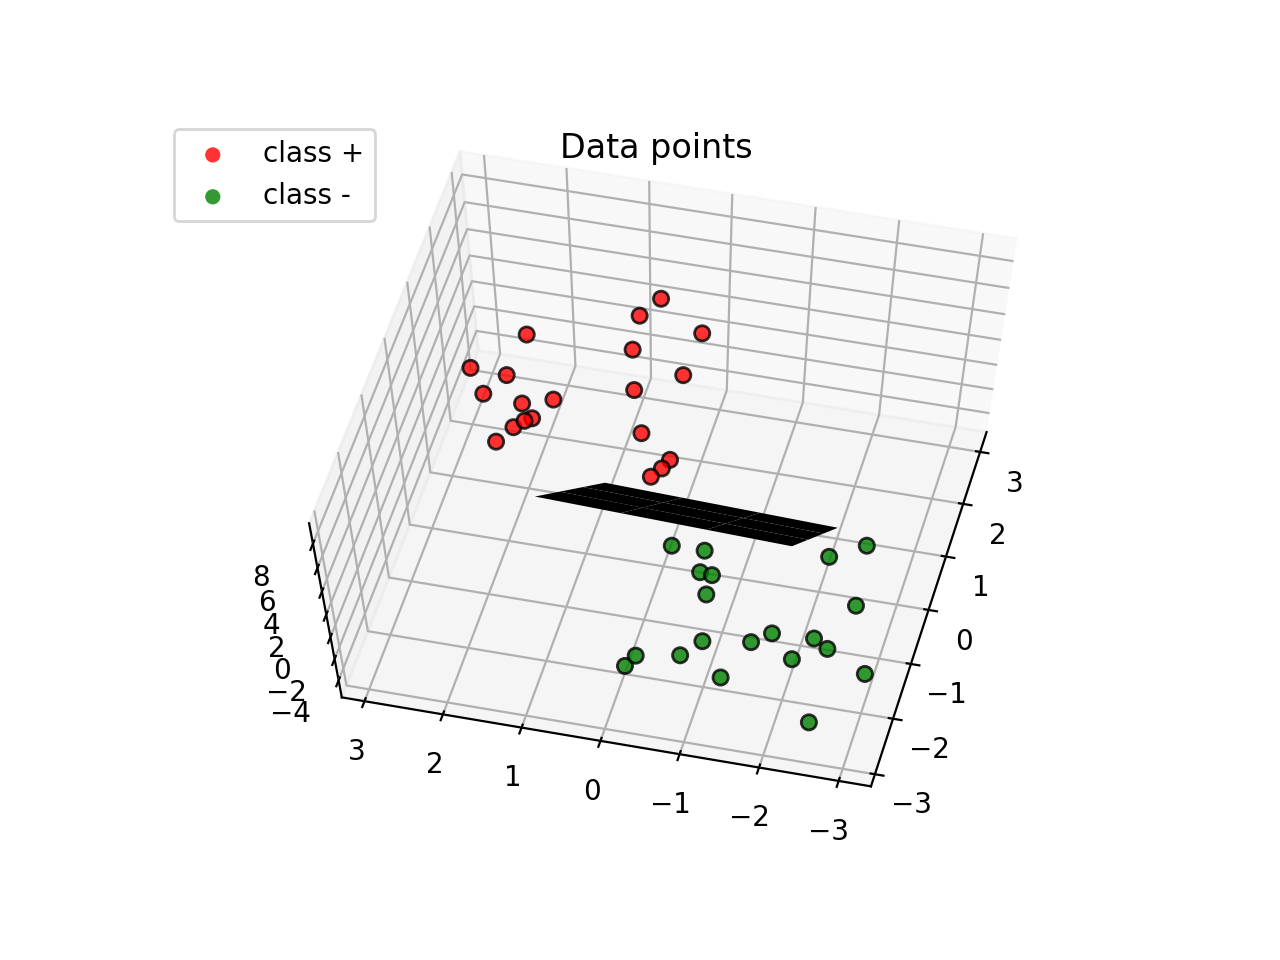

In [14]:
data = (positive_data, negative_data)
colors = ("red", "green")
groups = ("class +", "class -") 
 
# Create plot
fig = plt.figure()
ax = fig.gca(projection='3d')
 
for data, color, group in zip(data, colors, groups):
    ax.scatter(data[:,0], data[:,1], data[:,2],alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.title('Data points')
plt.legend(loc=2)
#plt.show()

a = np.arange(-2, 2, 1)
b = np.arange(-2, 2, 1)

xx, yy = np.meshgrid(a,b, sparse=True)
z = (-w[0] * xx - w[1] * yy) * (1. /w[2])
#plt3d = plt.figure().gca(projection='3d')
ax.plot_surface(xx, yy, z, shade=True, color='black')
plt.show()